In [14]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    print("Own install")
    sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                     '../../../..',  '../../../../3rdparty',
                     '../../..',     '../../../3rdparty',
                     '../..',        '../../3rdparty',
                     '..',           '../3rdparty' ]
    
else: # In colab
    ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
    sys.path.append('./Jove')
    sys.path.append('./Jove/jove')

# -- common imports --
from jove.PcpJupyterNew import *
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


## Question 1 (25 points):

### Solve the PCP instance given below by hand first (15 points) 


### TILES = [('110', '1'), ('1', '0'), ('0', '110'),       ('0','1')] 

### And then by using the tool (10 points)

### using the command pcp_solve( TILES  , OWN_INSTALL)  

### You may always use help(pcp_solve) for details

# Hand Solution

### Express it as a sequence of tiles with repetition, numbering the first tile 1, second tile 2, etc.

### Example: If the solution is Tile-1 then Tile-3, then Tile-2, then Tile-2, write 1322

Hand Solution: 14223

110__0__1__1___0

_1___1__0__0__110

In [10]:
# Tool Solution
pcp_solve([('110', '1'), ('1', '0'), ('0', '110'), ('0', '1')], OWN_INSTALL);

Detected platform linux
 Running the command ... :  ['./Jove/jove/pcp', '-i', 'temp.txt']
Solution(s) to PCP instance are below. Note: the tiles may be reversed,
  as the solver may sometimes present the solution in reverse.:

Solution 1
[3, 2, 2, 4, 1]
0   1   1   0   011 
011 0   0   1   1   




In [4]:
help(pcp_solve)

Help on function pcp_solve in module jove.PcpJupyterNew:

pcp_solve(pcp_pairs, OWN_INSTALL=False, run=None, ni=False, di=None, depth=None, tiles_per_row=15)
    Forward user input to a file, which we then use Ling Zhao's pcp solver to solve.
    :param OWN_INSTALL: if True, running on one's own machine; default is Colab (so false)
    :param pcp_pairs: List of tuple pairs representing pcp 'tiles'
    :param run: Number of runs to perform.
    :param ni: No iterative search.
    :param di: Depth increment.
    :param depth: Search depth.
    :param tiles_per_row: Number of tiles to show in single row together (useful for creating more meaningful output)



## Question 2 (25 points):

Part a (15 points): Adapt the proof of Theorem 15.3, Page 233, to a very similar proof that spells out that HaltTM is not recursive.  
HaltTM = {<M, w> : M is a TM and w its input and M halts on w}. Please imitate the proof of 15.3 step by step, making the necessary changes:

### Your proof below

Assume that HaltTM is recursive.

* Suppose there exists a decider A for A_(TM). A expects to be given Turing machine M and a input w in the form <M, w>.

* Build a Program called D as follows:
 * D takes in a single argument M.
 * As its first step, D invoked A on <M, M>.
 * This means if A(<M, M>) rejects, D(<<M>M>) acccepts, and if A(<M, M>) accepts, D(<<M>M>) rejects.
* If we enter D into our program we get D(<<D>D>) which calls A(<D, D>).

--

* Suppose A(<D, D>) rejects, which means according to our program D(<<D>D>) accepts.
* According to the advertised behavior of A which is that it is a decider for A_(TM), the fact that A(<D, D>) rejects means that D is a turing machine that doesn't accept D(<<D>D>), and that D(<<D>D>) rejects or loops.

--

* Now suppose A(<D, D>) accepts, which means D(<<D>D>) rejects.
* According to the advertised behavior of A which is that it is a decider for A_(TM), the fact that A(<D, D>) accepts means that D is a turing machine that accepts D(<<D>D>).

Therefore we obtain a contradiction under all cases which proves that HaltTM is not recursive.

Part b (10 points): Adapt the proof in Figure 15.10 to argue that CFL_TM is not 
recursive.  
CFL_TM = {\<M> : M is a TM whose language is context − free}

### Your proof below



## Question 3 (25 points):

- Design a deterministic Turing machine (DTM) over the input alphabet Σ = {a, b, #} for the language of all strings of the form w#x where w, x ∈ {a, b}∗ and w is a substring of x. See the definition of substring here: https://en.wikipedia.org/wiki/Substring

- You must design a deterministic Turing machine which absolutely has no non-determinism anywhere in its state transitions. A deterministic algorithm here requires searching for all w beginnings within x. A correct design will have a deterministic polynomial runtime.

- Add 5 more tests of your own.

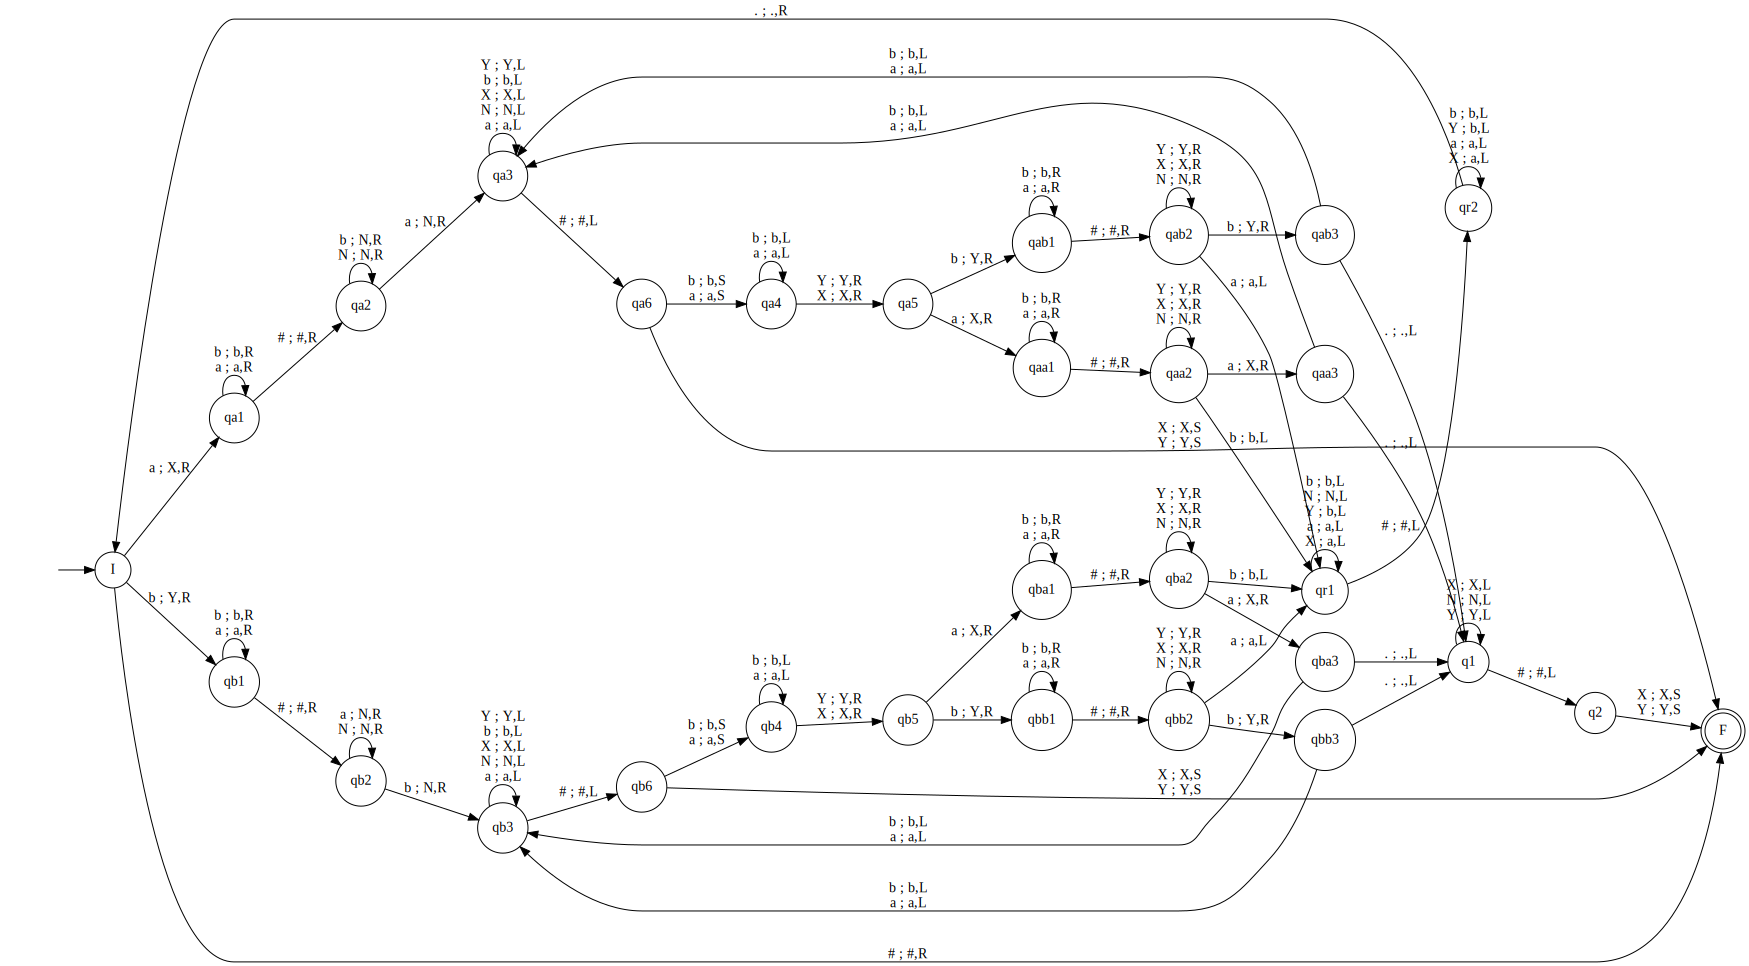

In [63]:
Asg9DTM = md2mc('''
TM     

!! --- Initial ---
I : # ; # , R -> F !! Nothing in substring



!! --- Starts with a ---
I : a ; X , R -> qa1

!! Go to section 2
qa1 : a ; a , R -> qa1
qa1 : b ; b , R -> qa1
qa1 : # ; # , R -> qa2

!! Look for the next starting a
qa2 : b ; N , R -> qa2
qa2 : a ; N , R -> qa3
qa2 : N ; N , R -> qa2

!! Go back to check the next character in section 1
qa3 : N ; N , L -> qa3
qa3 : X ; X , L -> qa3
qa3 : Y ; Y , L -> qa3
qa3 : a ; a , L -> qa3
qa3 : b ; b , L -> qa3
qa3 : # ; # , L -> qa6

qa6 : X ; X , S -> F !! we read all the substring
qa6 : Y ; Y , S -> F !! we read all the substring
qa6 : a ; a , S -> qa4
qa6 : b ; b , S -> qa4

qa4 : a ; a , L -> qa4
qa4 : b ; b , L -> qa4
qa4 : X ; X , R -> qa5
qa4 : Y ; Y , R -> qa5

qa5 : a ; X , R -> qaa1
qa5 : b ; Y , R -> qab1

!! Sub a - found an a
    !! Go to section 2
qaa1 : a ; a , R -> qaa1
qaa1 : b ; b , R -> qaa1
qaa1 : # ; # , R -> qaa2

    !! Go to the next a/b
qaa2 : N ; N , R -> qaa2
qaa2 : X ; X , R -> qaa2
qaa2 : Y ; Y , R -> qaa2
    !! Found a matching a
qaa2 : a ; X , R -> qaa3
qaa3 : . ; . , L -> q1 !! <-- hit the end of the tape
qaa3 : a ; a , L -> qa3
qaa3 : b ; b , L -> qa3
    !! Found a b instead
qaa2 : b ; b , L -> qr1

!! Sub a - found a b
    !! Go to section 2
qab1 : a ; a , R -> qab1
qab1 : b ; b , R -> qab1
qab1 : # ; # , R -> qab2

    !! Go to the next a/b
qab2 : N ; N , R -> qab2
qab2 : X ; X , R -> qab2
qab2 : Y ; Y , R -> qab2
    !! Found a matching b
qab2 : b ; Y , R -> qab3
qab3 : . ; . , L -> q1 !! <-- hit the end of the tape
qab3 : b ; b , L -> qa3
qab3 : a ; a , L -> qa3
    !! Found an a instead
qab2 : a ; a , L -> qr1



!! --- Starts with b ---
I : b ; Y , R -> qb1

!! Go to section 2
qb1 : a ; a , R -> qb1
qb1 : b ; b , R -> qb1
qb1 : # ; # , R -> qb2

!! Look for the next starting b
qb2 : b ; N , R -> qb3
qb2 : a ; N , R -> qb2
qb2 : N ; N , R -> qb2

!! Go back to check the next character in section 1
qb3 : N ; N , L -> qb3
qb3 : X ; X , L -> qb3
qb3 : Y ; Y , L -> qb3
qb3 : a ; a , L -> qb3
qb3 : b ; b , L -> qb3
qb3 : # ; # , L -> qb6

qb6 : X ; X , S -> F !! we read all the substring
qb6 : Y ; Y , S -> F !! we read all the substring
qb6 : a ; a , S -> qb4
qb6 : b ; b , S -> qb4

qb4 : a ; a , L -> qb4
qb4 : b ; b , L -> qb4
qb4 : X ; X , R -> qb5
qb4 : Y ; Y , R -> qb5

qb5 : a ; X , R -> qba1
qb5 : b ; Y , R -> qbb1

!! Sub b - found a
    !! Go to section 2
qba1 : a ; a , R -> qba1
qba1 : b ; b , R -> qba1
qba1 : # ; # , R -> qba2

    !! Go to the next a/b
qba2 : N ; N , R -> qba2
qba2 : X ; X , R -> qba2
qba2 : Y ; Y , R -> qba2
    !! Found a matching a
qba2 : a ; X , R -> qba3
qba3 : . ; . , L -> q1 !! <-- hit the end of the tape
qba3 : a ; a , L -> qb3
qba3 : b ; b , L -> qb3
    !! Found a b instead
qba2 : b ; b , L -> qr1

!! Sub b - found a b
    !! Go to section 2
qbb1 : a ; a , R -> qbb1
qbb1 : b ; b , R -> qbb1
qbb1 : # ; # , R -> qbb2

    !! Go to the next a/b
qbb2 : N ; N , R -> qbb2
qbb2 : X ; X , R -> qbb2
qbb2 : Y ; Y , R -> qbb2
    !! Found a matching b
qbb2 : b ; Y , R -> qbb3
qbb3 : . ; . , L -> q1 !! <-- hit the end of the tape
qbb3 : b ; b , L -> qb3
qbb3 : a ; a , L -> qb3
    !! Found an a instead
qbb2 : a ; a , L -> qr1



!! --- Reset tape to retry ---

!! Reset section 2
qr1 : N ; N , L -> qr1
qr1 : a ; a , L -> qr1
qr1 : b ; b , L -> qr1
qr1 : X ; a , L -> qr1
qr1 : Y ; b , L -> qr1
qr1 : # ; # , L -> qr2

!! Reset section 1
qr2 : a ; a , L -> qr2
qr2 : b ; b , L -> qr2
qr2 : X ; a , L -> qr2
qr2 : Y ; b , L -> qr2
qr2 : . ; . , R -> I !! goes back to the start (but doesnt reset because the Ns weren't reset)



!! --- Ensure all the substring was read when we reach the end of section 2 ---
q1 : X ; X , L -> q1
q1 : Y ; Y , L -> q1
q1 : N ; N , L -> q1
q1 : # ; # , L -> q2

!! Only go to final if all of the substring was read
q2 : X ; X , S -> F
q2 : Y ; Y , S -> F

''')
dotObj_tm(Asg9DTM, FuseEdges=True)

### Test Cases:

In [64]:
help(explore_tm)

Help on function explore_tm in module jove.Def_TM:

explore_tm(T, tape, nsteps)
    A handy routine to print the result of run_tm plus making 
    future extensions to explore run-results.



In [65]:
explore_tm(Asg9DTM, "aba#aba",50)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 2, 'XYX#NYX........', 15)
 via .. 
 ->('I', 0, 'aba#aba', 50)
 ->('qa1', 1, 'Xba#aba', 49)
 ->('qa1', 2, 'Xba#aba', 48)
 ->('qa1', 3, 'Xba#aba', 47)
 ->('qa2', 4, 'Xba#aba', 46)
 ->('qa3', 5, 'Xba#Nba', 45)
 ->('qa3', 4, 'Xba#Nba', 44)
 ->('qa3', 3, 'Xba#Nba', 43)
 ->('qa6', 2, 'Xba#Nba', 42)
 ->('qa4', 2, 'Xba#Nba', 41)
 ->('qa4', 1, 'Xba#Nba', 40)
 ->('qa4', 0, 'Xba#Nba', 39)
 ->('qa5', 1, 'Xba#Nba', 38)
 ->('qab1', 2, 'XYa#Nba', 37)
 ->('qab1', 3, 'XYa#Nba', 36)
 ->('qab2', 4, 'XYa#Nba', 35)
 ->('qab2', 5, 'XYa#Nba', 34)
 ->('qab3', 6, 'XYa#NYa', 33)
 ->('qa3', 5, 'XYa#NYa', 32)
 ->('qa3', 4, 'XYa#NYa', 31)
 ->('qa3', 3, 'XYa#NYa', 30)
 ->('qa6', 2, 'XYa#NYa', 29)
 ->('qa4', 2, 'XYa#NYa', 28)
 ->('qa4', 1, 'XYa#NYa', 27)
 ->('qa5', 2, 'XYa#NYa', 26)
 ->('qaa1', 3, 'XYX#NYa', 25)
 ->('qaa2', 4, 'XYX#NYa', 24)
 ->('qaa2', 5, 'XYX#NYa', 23)
 ->('qaa2', 6, 'XYX#NYa', 22)
 ->('qaa3', 7, 'XYX#NYX'

In [67]:
explore_tm(Asg9DTM, "aba#ab",50)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2', 2, 'XYa#NY........', 29)
 via .. 
 ->('I', 0, 'aba#ab', 50)
 ->('qa1', 1, 'Xba#ab', 49)
 ->('qa1', 2, 'Xba#ab', 48)
 ->('qa1', 3, 'Xba#ab', 47)
 ->('qa2', 4, 'Xba#ab', 46)
 ->('qa3', 5, 'Xba#Nb', 45)
 ->('qa3', 4, 'Xba#Nb', 44)
 ->('qa3', 3, 'Xba#Nb', 43)
 ->('qa6', 2, 'Xba#Nb', 42)
 ->('qa4', 2, 'Xba#Nb', 41)
 ->('qa4', 1, 'Xba#Nb', 40)
 ->('qa4', 0, 'Xba#Nb', 39)
 ->('qa5', 1, 'Xba#Nb', 38)
 ->('qab1', 2, 'XYa#Nb', 37)
 ->('qab1', 3, 'XYa#Nb', 36)
 ->('qab2', 4, 'XYa#Nb', 35)
 ->('qab2', 5, 'XYa#Nb', 34)
 ->('qab3', 6, 'XYa#NY', 33)
 ->('q1', 5, 'XYa#NY........', 32)
 ->('q1', 4, 'XYa#NY........', 31)
 ->('q1', 3, 'XYa#NY........', 30)
 ->('q2', 2, 'XYa#NY........', 29)


In [68]:
explore_tm(Asg9DTM, "aba#baba",50)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 2, 'XYX#NNYX........', 9)
 via .. 
 ->('I', 0, 'aba#baba', 50)
 ->('qa1', 1, 'Xba#baba', 49)
 ->('qa1', 2, 'Xba#baba', 48)
 ->('qa1', 3, 'Xba#baba', 47)
 ->('qa2', 4, 'Xba#baba', 46)
 ->('qa2', 5, 'Xba#Naba', 45)
 ->('qa3', 6, 'Xba#NNba', 44)
 ->('qa3', 5, 'Xba#NNba', 43)
 ->('qa3', 4, 'Xba#NNba', 42)
 ->('qa3', 3, 'Xba#NNba', 41)
 ->('qa6', 2, 'Xba#NNba', 40)
 ->('qa4', 2, 'Xba#NNba', 39)
 ->('qa4', 1, 'Xba#NNba', 38)
 ->('qa4', 0, 'Xba#NNba', 37)
 ->('qa5', 1, 'Xba#NNba', 36)
 ->('qab1', 2, 'XYa#NNba', 35)
 ->('qab1', 3, 'XYa#NNba', 34)
 ->('qab2', 4, 'XYa#NNba', 33)
 ->('qab2', 5, 'XYa#NNba', 32)
 ->('qab2', 6, 'XYa#NNba', 31)
 ->('qab3', 7, 'XYa#NNYa', 30)
 ->('qa3', 6, 'XYa#NNYa', 29)
 ->('qa3', 5, 'XYa#NNYa', 28)
 ->('qa3', 4, 'XYa#NNYa', 27)
 ->('qa3', 3, 'XYa#NNYa', 26)
 ->('qa6', 2, 'XYa#NNYa', 25)
 ->('qa4', 2, 'XYa#NNYa', 24)
 ->('qa4', 1, 'XYa#NNYa', 23)
 ->('qa5', 2, 'XYa#NNYa', 22

In [70]:
explore_tm(Asg9DTM, "aba#babba",500)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('qa3', 17, '........Xba#NNNNN', 449)
 via .. 
 ->('I', 0, 'aba#babba', 500)
 ->('qa1', 1, 'Xba#babba', 499)
 ->('qa1', 2, 'Xba#babba', 498)
 ->('qa1', 3, 'Xba#babba', 497)
 ->('qa2', 4, 'Xba#babba', 496)
 ->('qa2', 5, 'Xba#Nabba', 495)
 ->('qa3', 6, 'Xba#NNbba', 494)
 ->('qa3', 5, 'Xba#NNbba', 493)
 ->('qa3', 4, 'Xba#NNbba', 492)
 ->('qa3', 3, 'Xba#NNbba', 491)
 ->('qa6', 2, 'Xba#NNbba', 490)
 ->('qa4', 2, 'Xba#NNbba', 489)
 ->('qa4', 1, 'Xba#NNbba', 488)
 ->('qa4', 0, 'Xba#NNbba', 487)
 ->('qa5', 1, 'Xba#NNbba', 486)
 ->('qab1', 2, 'XYa#NNbba', 485)
 ->('qab1', 3, 'XYa#NNbba', 484)
 ->('qab2', 4, 'XYa#NNbba', 483)
 ->('qab2', 5, 'XYa#NNbba', 482)
 ->('qab2', 6, 'XYa#NNbba', 481)
 ->('qab3', 7, 'XYa#NNYba', 480)
 ->('qa3', 6, 'XYa#NNYba', 479)
 ->('qa3', 5, 'XYa#NNYba', 478)
 ->('qa3', 4, 'XYa#NNYba', 477)
 ->('qa3', 3, 'XYa#NNYba', 476)
 ->('qa6', 2, 'XYa#NNYb

In [71]:
explore_tm(Asg9DTM, "bba#bbabba",50)

Detailing the halted configs now.
Accepted at  ('F', 2, 'YYX#NYXbba', 15)
 via .. 
 ->('I', 0, 'bba#bbabba', 50)
 ->('qb1', 1, 'Yba#bbabba', 49)
 ->('qb1', 2, 'Yba#bbabba', 48)
 ->('qb1', 3, 'Yba#bbabba', 47)
 ->('qb2', 4, 'Yba#bbabba', 46)
 ->('qb3', 5, 'Yba#Nbabba', 45)
 ->('qb3', 4, 'Yba#Nbabba', 44)
 ->('qb3', 3, 'Yba#Nbabba', 43)
 ->('qb6', 2, 'Yba#Nbabba', 42)
 ->('qb4', 2, 'Yba#Nbabba', 41)
 ->('qb4', 1, 'Yba#Nbabba', 40)
 ->('qb4', 0, 'Yba#Nbabba', 39)
 ->('qb5', 1, 'Yba#Nbabba', 38)
 ->('qbb1', 2, 'YYa#Nbabba', 37)
 ->('qbb1', 3, 'YYa#Nbabba', 36)
 ->('qbb2', 4, 'YYa#Nbabba', 35)
 ->('qbb2', 5, 'YYa#Nbabba', 34)
 ->('qbb3', 6, 'YYa#NYabba', 33)
 ->('qb3', 5, 'YYa#NYabba', 32)
 ->('qb3', 4, 'YYa#NYabba', 31)
 ->('qb3', 3, 'YYa#NYabba', 30)
 ->('qb6', 2, 'YYa#NYabba', 29)
 ->('qb4', 2, 'YYa#NYabba', 28)
 ->('qb4', 1, 'YYa#NYabba', 27)
 ->('qb5', 2, 'YYa#NYabba', 26)
 ->('qba1', 3, 'YYX#NYabba', 25)
 ->('qba2', 4, 'YYX#NYabba', 24)
 ->('qba2', 5, 'YYX#NYabba', 23)
 ->('qba2', 6, 

### 5 Tests You Add:

In [73]:
# Test 1
explore_tm(Asg9DTM, "#ba",50)

Detailing the halted configs now.
Accepted at  ('F', 1, '#ba', 49)
 via .. 
 ->('I', 0, '#ba', 50)
 ->('F', 1, '#ba', 49)


In [75]:
# Test 2
explore_tm(Asg9DTM, "bbaa#bbabbaa",500)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 11, '........YYXX#NNNNYXX........', 333)
 via .. 
 ->('I', 0, 'bbaa#bbabbaa', 500)
 ->('qb1', 1, 'Ybaa#bbabbaa', 499)
 ->('qb1', 2, 'Ybaa#bbabbaa', 498)
 ->('qb1', 3, 'Ybaa#bbabbaa', 497)
 ->('qb1', 4, 'Ybaa#bbabbaa', 496)
 ->('qb2', 5, 'Ybaa#bbabbaa', 495)
 ->('qb3', 6, 'Ybaa#Nbabbaa', 494)
 ->('qb3', 5, 'Ybaa#Nbabbaa', 493)
 ->('qb3', 4, 'Ybaa#Nbabbaa', 492)
 ->('qb6', 3, 'Ybaa#Nbabbaa', 491)
 ->('qb4', 3, 'Ybaa#Nbabbaa', 490)
 ->('qb4', 2, 'Ybaa#Nbabbaa', 489)
 ->('qb4', 1, 'Ybaa#Nbabbaa', 488)
 ->('qb4', 0, 'Ybaa#Nbabbaa', 487)
 ->('qb5', 1, 'Ybaa#Nbabbaa', 486)
 ->('qbb1', 2, 'YYaa#Nbabbaa', 485)
 ->('qbb1', 3, 'YYaa#Nbabbaa', 484)
 ->('qbb1', 4, 'YYaa#Nbabbaa', 483)
 ->('qbb2', 5, 'YYaa#Nbabbaa', 482)
 ->('qbb2', 6, 'YYaa#Nbabbaa', 481)
 ->('qbb3', 7, 'YYaa#NYabbaa', 480)
 ->('qb3', 6, 'YYaa#NYabbaa', 479)
 ->('qb3', 5, 'YYaa#NYabbaa', 478)
 ->('qb3'

In [76]:
# Test 3
explore_tm(Asg9DTM, "bba#bbabba",50)

Detailing the halted configs now.
Accepted at  ('F', 2, 'YYX#NYXbba', 15)
 via .. 
 ->('I', 0, 'bba#bbabba', 50)
 ->('qb1', 1, 'Yba#bbabba', 49)
 ->('qb1', 2, 'Yba#bbabba', 48)
 ->('qb1', 3, 'Yba#bbabba', 47)
 ->('qb2', 4, 'Yba#bbabba', 46)
 ->('qb3', 5, 'Yba#Nbabba', 45)
 ->('qb3', 4, 'Yba#Nbabba', 44)
 ->('qb3', 3, 'Yba#Nbabba', 43)
 ->('qb6', 2, 'Yba#Nbabba', 42)
 ->('qb4', 2, 'Yba#Nbabba', 41)
 ->('qb4', 1, 'Yba#Nbabba', 40)
 ->('qb4', 0, 'Yba#Nbabba', 39)
 ->('qb5', 1, 'Yba#Nbabba', 38)
 ->('qbb1', 2, 'YYa#Nbabba', 37)
 ->('qbb1', 3, 'YYa#Nbabba', 36)
 ->('qbb2', 4, 'YYa#Nbabba', 35)
 ->('qbb2', 5, 'YYa#Nbabba', 34)
 ->('qbb3', 6, 'YYa#NYabba', 33)
 ->('qb3', 5, 'YYa#NYabba', 32)
 ->('qb3', 4, 'YYa#NYabba', 31)
 ->('qb3', 3, 'YYa#NYabba', 30)
 ->('qb6', 2, 'YYa#NYabba', 29)
 ->('qb4', 2, 'YYa#NYabba', 28)
 ->('qb4', 1, 'YYa#NYabba', 27)
 ->('qb5', 2, 'YYa#NYabba', 26)
 ->('qba1', 3, 'YYX#NYabba', 25)
 ->('qba2', 4, 'YYX#NYabba', 24)
 ->('qba2', 5, 'YYX#NYabba', 23)
 ->('qba2', 6, 

In [78]:
# Test 4
explore_tm(Asg9DTM, "baba#bbaaba",500)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2', 11, '........YXba#NNNNNX........', 385)
 via .. 
 ->('I', 0, 'baba#bbaaba', 500)
 ->('qb1', 1, 'Yaba#bbaaba', 499)
 ->('qb1', 2, 'Yaba#bbaaba', 498)
 ->('qb1', 3, 'Yaba#bbaaba', 497)
 ->('qb1', 4, 'Yaba#bbaaba', 496)
 ->('qb2', 5, 'Yaba#bbaaba', 495)
 ->('qb3', 6, 'Yaba#Nbaaba', 494)
 ->('qb3', 5, 'Yaba#Nbaaba', 493)
 ->('qb3', 4, 'Yaba#Nbaaba', 492)
 ->('qb6', 3, 'Yaba#Nbaaba', 491)
 ->('qb4', 3, 'Yaba#Nbaaba', 490)
 ->('qb4', 2, 'Yaba#Nbaaba', 489)
 ->('qb4', 1, 'Yaba#Nbaaba', 488)
 ->('qb4', 0, 'Yaba#Nbaaba', 487)
 ->('qb5', 1, 'Yaba#Nbaaba', 486)
 ->('qba1', 2, 'YXba#Nbaaba', 485)
 ->('qba1', 3, 'YXba#Nbaaba', 484)
 ->('qba1', 4, 'YXba#Nbaaba', 483)
 ->('qba2', 5, 'YXba#Nbaaba', 482)
 ->('qba2', 6, 'YXba#Nbaaba', 481)
 ->('qr1', 5, 'YXba#Nbaaba', 480)
 ->('qr1', 4, 'YXba#Nbaaba', 479)
 ->('qr2', 3, 'YXba#Nbaaba', 478)
 ->('qr2', 2, 'YXba#Nbaaba', 477)

In [79]:
# Test 5
explore_tm(Asg9DTM, "babb#bbababba",500)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F', 11, '........YXYY#NNNNXYYa', 329)
 via .. 
 ->('I', 0, 'babb#bbababba', 500)
 ->('qb1', 1, 'Yabb#bbababba', 499)
 ->('qb1', 2, 'Yabb#bbababba', 498)
 ->('qb1', 3, 'Yabb#bbababba', 497)
 ->('qb1', 4, 'Yabb#bbababba', 496)
 ->('qb2', 5, 'Yabb#bbababba', 495)
 ->('qb3', 6, 'Yabb#Nbababba', 494)
 ->('qb3', 5, 'Yabb#Nbababba', 493)
 ->('qb3', 4, 'Yabb#Nbababba', 492)
 ->('qb6', 3, 'Yabb#Nbababba', 491)
 ->('qb4', 3, 'Yabb#Nbababba', 490)
 ->('qb4', 2, 'Yabb#Nbababba', 489)
 ->('qb4', 1, 'Yabb#Nbababba', 488)
 ->('qb4', 0, 'Yabb#Nbababba', 487)
 ->('qb5', 1, 'Yabb#Nbababba', 486)
 ->('qba1', 2, 'YXbb#Nbababba', 485)
 ->('qba1', 3, 'YXbb#Nbababba', 484)
 ->('qba1', 4, 'YXbb#Nbababba', 483)
 ->('qba2', 5, 'YXbb#Nbababba', 482)
 ->('qba2', 6, 'YXbb#Nbababba', 481)
 ->('qr1', 5, 'YXbb#Nbababba', 480)
 ->('qr1', 4, 'YXbb#Nbababba', 479)
 ->('qr2', 3, 'YXbb#Nbababba', 478)
 ->('qr2', 2, 'YXbb#Nbababba', 477

## Question 4 (25 points):


-  Design a non-deterministic Turing machine (NDTM) over the input alphabet Σ = {a, b, #} for the language of all strings of the form w#x where w, x ∈ {a, b}∗ and w is a substring of x. See the definition of substring here: https://en.wikipedia.org/wiki/Substring

- You must design a non-deterministic Turing machine—i.e., not design a DTM and call it an NDTM. You must employ a distinct phase of taking a guess (indicating it via your comments) and check the guess. A correct design will have a nondeterministic polynomial runtime, which means once the guess is made, only a polynomial zig-zag search must be involved to confirm the guess.

- Add 5 tests on your own.

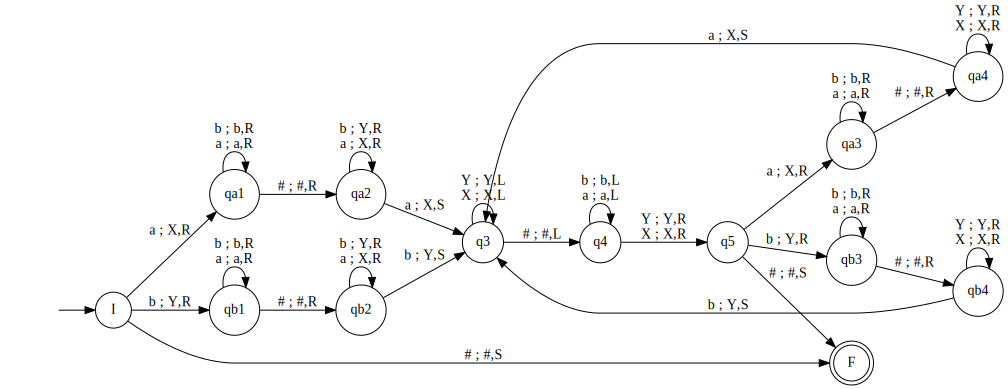

In [95]:
# w#x NDTM
Asg9NDTM = md2mc('''TM

I : # ; # , S -> F

!! Read the next element in the substring
I : a ; X , R -> qa1
I : b ; Y , R -> qb1



!! Finds and forks at all the possible starting points

!! Search for an a
qa1 : a ; a , R -> qa1
qa1 : b ; b , R -> qa1
qa1 : # ; # , R -> qa2

qa2 : b ; Y , R -> qa2
qa2 : a ; X , R -> qa2
qa2 : a ; X , S -> q3

!! Search for a b
qb1 : a ; a , R -> qb1
qb1 : b ; b , R -> qb1
qb1 : # ; # , R -> qb2

qb2 : a ; X , R -> qb2
qb2 : b ; Y , R -> qb2
qb2 : b ; Y , S -> q3



!! Loop through the remaining substring
q3 : Y ; Y , L -> q3
q3 : X ; X , L -> q3
q3 : # ; # , L -> q4

q4 : a ; a , L -> q4
q4 : b ; b , L -> q4
q4 : X ; X , R -> q5
q4 : Y ; Y , R -> q5

q5 : # ; # , S -> F
q5 : a ; X , R -> qa3
q5 : b ; Y , R -> qb3

!! Sub a
qa3 : a ; a , R -> qa3
qa3 : b ; b , R -> qa3
qa3 : # ; # , R -> qa4

qa4 : X ; X , R -> qa4
qa4 : Y ; Y , R -> qa4
qa4 : a ; X , S -> q3

!! Sub b
qb3 : a ; a , R -> qb3
qb3 : b ; b , R -> qb3
qb3 : # ; # , R -> qb4

qb4 : X ; X , R -> qb4
qb4 : Y ; Y , R -> qb4
qb4 : b ; Y , S -> q3

''')
dotObj_tm(Asg9NDTM, FuseEdges=True)

### Test Cases:

In [96]:
explore_tm(Asg9NDTM, "aba#aba",50)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 3, 'XYX#XYX', 19)
 via .. 
 ->('I', 0, 'aba#aba', 50)
 ->('qa1', 1, 'Xba#aba', 49)
 ->('qa1', 2, 'Xba#aba', 48)
 ->('qa1', 3, 'Xba#aba', 47)
 ->('qa2', 4, 'Xba#aba', 46)
 ->('q3', 4, 'Xba#Xba', 45)
 ->('q3', 3, 'Xba#Xba', 44)
 ->('q4', 2, 'Xba#Xba', 43)
 ->('q4', 1, 'Xba#Xba', 42)
 ->('q4', 0, 'Xba#Xba', 41)
 ->('q5', 1, 'Xba#Xba', 40)
 ->('qb3', 2, 'XYa#Xba', 39)
 ->('qb3', 3, 'XYa#Xba', 38)
 ->('qb4', 4, 'XYa#Xba', 37)
 ->('qb4', 5, 'XYa#Xba', 36)
 ->('q3', 5, 'XYa#XYa', 35)
 ->('q3', 4, 'XYa#XYa', 34)
 ->('q3', 3, 'XYa#XYa', 33)
 ->('q4', 2, 'XYa#XYa', 32)
 ->('q4', 1, 'XYa#XYa', 31)
 ->('q5', 2, 'XYa#XYa', 30)
 ->('qa3', 3, 'XYX#XYa', 29)
 ->('qa4', 4, 'XYX#XYa', 28)
 ->('qa4', 5, 'XYX#XYa', 27)
 ->('qa4', 6, 'XYX#XYa', 26)
 ->('q3', 6, 'XYX#XYX', 25)
 ->('q3', 5, 'XYX#XYX', 24)
 ->('q3', 4, 'XYX#XYX', 23)
 ->('q3', 3, 'XYX#XYX', 22)
 ->('q4', 2, 'XYX

In [97]:
explore_tm(Asg9NDTM, "aba#ab",50)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('qa4', 6, 'XYX#XY', 26)
 via .. 
 ->('I', 0, 'aba#ab', 50)
 ->('qa1', 1, 'Xba#ab', 49)
 ->('qa1', 2, 'Xba#ab', 48)
 ->('qa1', 3, 'Xba#ab', 47)
 ->('qa2', 4, 'Xba#ab', 46)
 ->('q3', 4, 'Xba#Xb', 45)
 ->('q3', 3, 'Xba#Xb', 44)
 ->('q4', 2, 'Xba#Xb', 43)
 ->('q4', 1, 'Xba#Xb', 42)
 ->('q4', 0, 'Xba#Xb', 41)
 ->('q5', 1, 'Xba#Xb', 40)
 ->('qb3', 2, 'XYa#Xb', 39)
 ->('qb3', 3, 'XYa#Xb', 38)
 ->('qb4', 4, 'XYa#Xb', 37)
 ->('qb4', 5, 'XYa#Xb', 36)
 ->('q3', 5, 'XYa#XY', 35)
 ->('q3', 4, 'XYa#XY', 34)
 ->('q3', 3, 'XYa#XY', 33)
 ->('q4', 2, 'XYa#XY', 32)
 ->('q4', 1, 'XYa#XY', 31)
 ->('q5', 2, 'XYa#XY', 30)
 ->('qa3', 3, 'XYX#XY', 29)
 ->('qa4', 4, 'XYX#XY', 28)
 ->('qa4', 5, 'XYX#XY', 27)
 ->('qa4', 6, 'XYX#XY', 26)
Rejected at  ('qa2', 6, 'Xba#XY', 44)
 via .. 
 ->('I', 0, 'aba#ab', 50)
 ->('qa1', 1, 'Xba#ab', 49)
 ->('qa1', 2, 'Xba#ab', 48)
 ->('qa1', 3, 'Xba#ab', 

In [98]:
explore_tm(Asg9NDTM, "aba#baba",50)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 3, 'XYX#YXYX', 13)
 via .. 
 ->('I', 0, 'aba#baba', 50)
 ->('qa1', 1, 'Xba#baba', 49)
 ->('qa1', 2, 'Xba#baba', 48)
 ->('qa1', 3, 'Xba#baba', 47)
 ->('qa2', 4, 'Xba#baba', 46)
 ->('qa2', 5, 'Xba#Yaba', 45)
 ->('q3', 5, 'Xba#YXba', 44)
 ->('q3', 4, 'Xba#YXba', 43)
 ->('q3', 3, 'Xba#YXba', 42)
 ->('q4', 2, 'Xba#YXba', 41)
 ->('q4', 1, 'Xba#YXba', 40)
 ->('q4', 0, 'Xba#YXba', 39)
 ->('q5', 1, 'Xba#YXba', 38)
 ->('qb3', 2, 'XYa#YXba', 37)
 ->('qb3', 3, 'XYa#YXba', 36)
 ->('qb4', 4, 'XYa#YXba', 35)
 ->('qb4', 5, 'XYa#YXba', 34)
 ->('qb4', 6, 'XYa#YXba', 33)
 ->('q3', 6, 'XYa#YXYa', 32)
 ->('q3', 5, 'XYa#YXYa', 31)
 ->('q3', 4, 'XYa#YXYa', 30)
 ->('q3', 3, 'XYa#YXYa', 29)
 ->('q4', 2, 'XYa#YXYa', 28)
 ->('q4', 1, 'XYa#YXYa', 27)
 ->('q5', 2, 'XYa#YXYa', 26)
 ->('qa3', 3, 'XYX#YXYa', 25)
 ->('qa4', 4, 'XYX#YXYa', 24)
 ->('qa4', 5, 'XYX#YXYa', 23)
 ->('qa4', 6, '

In [99]:
explore_tm(Asg9NDTM, "aba#babba",50)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('qa4', 7, 'XYX#YXYba', 21)
 via .. 
 ->('I', 0, 'aba#babba', 50)
 ->('qa1', 1, 'Xba#babba', 49)
 ->('qa1', 2, 'Xba#babba', 48)
 ->('qa1', 3, 'Xba#babba', 47)
 ->('qa2', 4, 'Xba#babba', 46)
 ->('qa2', 5, 'Xba#Yabba', 45)
 ->('q3', 5, 'Xba#YXbba', 44)
 ->('q3', 4, 'Xba#YXbba', 43)
 ->('q3', 3, 'Xba#YXbba', 42)
 ->('q4', 2, 'Xba#YXbba', 41)
 ->('q4', 1, 'Xba#YXbba', 40)
 ->('q4', 0, 'Xba#YXbba', 39)
 ->('q5', 1, 'Xba#YXbba', 38)
 ->('qb3', 2, 'XYa#YXbba', 37)
 ->('qb3', 3, 'XYa#YXbba', 36)
 ->('qb4', 4, 'XYa#YXbba', 35)
 ->('qb4', 5, 'XYa#YXbba', 34)
 ->('qb4', 6, 'XYa#YXbba', 33)
 ->('q3', 6, 'XYa#YXYba', 32)
 ->('q3', 5, 'XYa#YXYba', 31)
 ->('q3', 4, 'XYa#YXYba', 30)
 ->('q3', 3, 'XYa#YXYba', 29)
 ->('q4', 2, 'XYa#YXYba', 28)
 ->('q4', 1, 'XYa#YXYba', 27)
 ->('q5', 2, 'XYa#YXYba', 26)
 ->('qa3', 3, 'XYX#YXYba', 25)
 ->('qa4', 4, 'XYX#YXYba', 24)
 ->('qa4', 5, '

In [100]:
explore_tm(Asg9NDTM, "bba#bbabba",50)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('qb2', 10, 'Yba#YYXYYX', 40)
 via .. 
 ->('I', 0, 'bba#bbabba', 50)
 ->('qb1', 1, 'Yba#bbabba', 49)
 ->('qb1', 2, 'Yba#bbabba', 48)
 ->('qb1', 3, 'Yba#bbabba', 47)
 ->('qb2', 4, 'Yba#bbabba', 46)
 ->('qb2', 5, 'Yba#Ybabba', 45)
 ->('qb2', 6, 'Yba#YYabba', 44)
 ->('qb2', 7, 'Yba#YYXbba', 43)
 ->('qb2', 8, 'Yba#YYXYba', 42)
 ->('qb2', 9, 'Yba#YYXYYa', 41)
 ->('qb2', 10, 'Yba#YYXYYX', 40)
Rejected at  ('qb4', 9, 'YYa#YYXYYa', 24)
 via .. 
 ->('I', 0, 'bba#bbabba', 50)
 ->('qb1', 1, 'Yba#bbabba', 49)
 ->('qb1', 2, 'Yba#bbabba', 48)
 ->('qb1', 3, 'Yba#bbabba', 47)
 ->('qb2', 4, 'Yba#bbabba', 46)
 ->('qb2', 5, 'Yba#Ybabba', 45)
 ->('qb2', 6, 'Yba#YYabba', 44)
 ->('qb2', 7, 'Yba#YYXbba', 43)
 ->('qb2', 8, 'Yba#YYXYba', 42)
 ->('q3', 8, 'Yba#YYXYYa', 41)
 ->('q3', 7, 'Yba#YYXYYa', 40)
 ->('q3', 6, 'Yba#YYXYYa', 39)
 ->('q3', 5, 'Yba#YYXYYa', 38)
 ->('q3', 4, 'Yba#YYXYYa', 37)
 ->('q3', 3, 'Yba#YYXYYa', 36)


### 5 Test Cases You Add

In [101]:
# Test 1
explore_tm(Asg9DTM, "#ba",50)

Detailing the halted configs now.
Accepted at  ('F', 1, '#ba', 49)
 via .. 
 ->('I', 0, '#ba', 50)
 ->('F', 1, '#ba', 49)


In [102]:
# Test 2
explore_tm(Asg9DTM, "bbaa#bbabbaa",500)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 11, '........YYXX#NNNNYXX........', 333)
 via .. 
 ->('I', 0, 'bbaa#bbabbaa', 500)
 ->('qb1', 1, 'Ybaa#bbabbaa', 499)
 ->('qb1', 2, 'Ybaa#bbabbaa', 498)
 ->('qb1', 3, 'Ybaa#bbabbaa', 497)
 ->('qb1', 4, 'Ybaa#bbabbaa', 496)
 ->('qb2', 5, 'Ybaa#bbabbaa', 495)
 ->('qb3', 6, 'Ybaa#Nbabbaa', 494)
 ->('qb3', 5, 'Ybaa#Nbabbaa', 493)
 ->('qb3', 4, 'Ybaa#Nbabbaa', 492)
 ->('qb6', 3, 'Ybaa#Nbabbaa', 491)
 ->('qb4', 3, 'Ybaa#Nbabbaa', 490)
 ->('qb4', 2, 'Ybaa#Nbabbaa', 489)
 ->('qb4', 1, 'Ybaa#Nbabbaa', 488)
 ->('qb4', 0, 'Ybaa#Nbabbaa', 487)
 ->('qb5', 1, 'Ybaa#Nbabbaa', 486)
 ->('qbb1', 2, 'YYaa#Nbabbaa', 485)
 ->('qbb1', 3, 'YYaa#Nbabbaa', 484)
 ->('qbb1', 4, 'YYaa#Nbabbaa', 483)
 ->('qbb2', 5, 'YYaa#Nbabbaa', 482)
 ->('qbb2', 6, 'YYaa#Nbabbaa', 481)
 ->('qbb3', 7, 'YYaa#NYabbaa', 480)
 ->('qb3', 6, 'YYaa#NYabbaa', 479)
 ->('qb3', 5, 'YYaa#NYabbaa', 478)
 ->('qb3'

In [103]:
# Test 3
explore_tm(Asg9DTM, "bba#bbabba",50)

Detailing the halted configs now.
Accepted at  ('F', 2, 'YYX#NYXbba', 15)
 via .. 
 ->('I', 0, 'bba#bbabba', 50)
 ->('qb1', 1, 'Yba#bbabba', 49)
 ->('qb1', 2, 'Yba#bbabba', 48)
 ->('qb1', 3, 'Yba#bbabba', 47)
 ->('qb2', 4, 'Yba#bbabba', 46)
 ->('qb3', 5, 'Yba#Nbabba', 45)
 ->('qb3', 4, 'Yba#Nbabba', 44)
 ->('qb3', 3, 'Yba#Nbabba', 43)
 ->('qb6', 2, 'Yba#Nbabba', 42)
 ->('qb4', 2, 'Yba#Nbabba', 41)
 ->('qb4', 1, 'Yba#Nbabba', 40)
 ->('qb4', 0, 'Yba#Nbabba', 39)
 ->('qb5', 1, 'Yba#Nbabba', 38)
 ->('qbb1', 2, 'YYa#Nbabba', 37)
 ->('qbb1', 3, 'YYa#Nbabba', 36)
 ->('qbb2', 4, 'YYa#Nbabba', 35)
 ->('qbb2', 5, 'YYa#Nbabba', 34)
 ->('qbb3', 6, 'YYa#NYabba', 33)
 ->('qb3', 5, 'YYa#NYabba', 32)
 ->('qb3', 4, 'YYa#NYabba', 31)
 ->('qb3', 3, 'YYa#NYabba', 30)
 ->('qb6', 2, 'YYa#NYabba', 29)
 ->('qb4', 2, 'YYa#NYabba', 28)
 ->('qb4', 1, 'YYa#NYabba', 27)
 ->('qb5', 2, 'YYa#NYabba', 26)
 ->('qba1', 3, 'YYX#NYabba', 25)
 ->('qba2', 4, 'YYX#NYabba', 24)
 ->('qba2', 5, 'YYX#NYabba', 23)
 ->('qba2', 6, 

In [104]:
# Test 4
explore_tm(Asg9DTM, "baba#bbaaba",500)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2', 11, '........YXba#NNNNNX........', 385)
 via .. 
 ->('I', 0, 'baba#bbaaba', 500)
 ->('qb1', 1, 'Yaba#bbaaba', 499)
 ->('qb1', 2, 'Yaba#bbaaba', 498)
 ->('qb1', 3, 'Yaba#bbaaba', 497)
 ->('qb1', 4, 'Yaba#bbaaba', 496)
 ->('qb2', 5, 'Yaba#bbaaba', 495)
 ->('qb3', 6, 'Yaba#Nbaaba', 494)
 ->('qb3', 5, 'Yaba#Nbaaba', 493)
 ->('qb3', 4, 'Yaba#Nbaaba', 492)
 ->('qb6', 3, 'Yaba#Nbaaba', 491)
 ->('qb4', 3, 'Yaba#Nbaaba', 490)
 ->('qb4', 2, 'Yaba#Nbaaba', 489)
 ->('qb4', 1, 'Yaba#Nbaaba', 488)
 ->('qb4', 0, 'Yaba#Nbaaba', 487)
 ->('qb5', 1, 'Yaba#Nbaaba', 486)
 ->('qba1', 2, 'YXba#Nbaaba', 485)
 ->('qba1', 3, 'YXba#Nbaaba', 484)
 ->('qba1', 4, 'YXba#Nbaaba', 483)
 ->('qba2', 5, 'YXba#Nbaaba', 482)
 ->('qba2', 6, 'YXba#Nbaaba', 481)
 ->('qr1', 5, 'YXba#Nbaaba', 480)
 ->('qr1', 4, 'YXba#Nbaaba', 479)
 ->('qr2', 3, 'YXba#Nbaaba', 478)
 ->('qr2', 2, 'YXba#Nbaaba', 477)

In [105]:
# Test 5
explore_tm(Asg9DTM, "babb#bbababba",500)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F', 11, '........YXYY#NNNNXYYa', 329)
 via .. 
 ->('I', 0, 'babb#bbababba', 500)
 ->('qb1', 1, 'Yabb#bbababba', 499)
 ->('qb1', 2, 'Yabb#bbababba', 498)
 ->('qb1', 3, 'Yabb#bbababba', 497)
 ->('qb1', 4, 'Yabb#bbababba', 496)
 ->('qb2', 5, 'Yabb#bbababba', 495)
 ->('qb3', 6, 'Yabb#Nbababba', 494)
 ->('qb3', 5, 'Yabb#Nbababba', 493)
 ->('qb3', 4, 'Yabb#Nbababba', 492)
 ->('qb6', 3, 'Yabb#Nbababba', 491)
 ->('qb4', 3, 'Yabb#Nbababba', 490)
 ->('qb4', 2, 'Yabb#Nbababba', 489)
 ->('qb4', 1, 'Yabb#Nbababba', 488)
 ->('qb4', 0, 'Yabb#Nbababba', 487)
 ->('qb5', 1, 'Yabb#Nbababba', 486)
 ->('qba1', 2, 'YXbb#Nbababba', 485)
 ->('qba1', 3, 'YXbb#Nbababba', 484)
 ->('qba1', 4, 'YXbb#Nbababba', 483)
 ->('qba2', 5, 'YXbb#Nbababba', 482)
 ->('qba2', 6, 'YXbb#Nbababba', 481)
 ->('qr1', 5, 'YXbb#Nbababba', 480)
 ->('qr1', 4, 'YXbb#Nbababba', 479)
 ->('qr2', 3, 'YXbb#Nbababba', 478)
 ->('qr2', 2, 'YXbb#Nbababba', 477

# END
